In [5]:
%pip install seaborn
 



Note: you may need to restart the kernel to use updated packages.


In [6]:
import json
import re
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter



Converted the processed DataFrame to a JSON format for easy storage and data interchange.


In [7]:
with open("phone.json", 'r', encoding="utf-8") as phone_json:
    phone_dict = json.load(phone_json)
#


In [8]:
temp_dict = {}
temp_dict[phone_dict[1]["brand_name"]]= {
    phone_dict[1]["devices"][1]["model_name"]:{
        "image_url":phone_dict[1]["devices"][1]["imageUrl"],
        "specification": phone_dict[1]["devices"][1]["specifications"]
    }
}

In [9]:
updated_phone_dict = {}

for i in tqdm(range(0, len(phone_dict))):
    updated_phone_dict[phone_dict[i]["brand_name"]] = {}
    temp_dict = {}
    for j in range(0, len(phone_dict[i]["devices"])):
        model_name = phone_dict[i]["devices"][j]["model_name"]
        temp_dict[model_name] = {
            "imageUrl" : phone_dict[i]["devices"][j]["imageUrl"],
            "Specifications" : phone_dict[i]["devices"][j]["specifications"]
        }
    
    updated_phone_dict[phone_dict[i]["brand_name"]] = temp_dict

with open("updated_phone_dict.json", "w") as new_dict:
    json.dump(updated_phone_dict, new_dict, indent=2)


100%|██████████| 125/125 [00:00<00:00, 1186.76it/s]


In [10]:
num_brands = len(updated_phone_dict)
num_brands

125

Created `number_of_devices.xlsx` from the dataset to summarize the total number of devices per brand for further analysis.


In [11]:
num_model_per_brands = []
for key in updated_phone_dict.keys():
    temp_tuple = (key, len(updated_phone_dict[key]))
    num_model_per_brands.append(temp_tuple)

df_num_devices = pd.DataFrame(num_model_per_brands, columns=["brand_name", "devices"])
df_num_devices.to_excel("number_of_devices.xlsx", index=False)


Created `df_num_devices_launched_per_year.xlsx` summarizing the number of devices launched and discontinued by each brand per year.


In [12]:
num_devices_launched_per_year = []

for key in tqdm(updated_phone_dict):
    brand_name = key
  
    for model in updated_phone_dict[brand_name]:
        model_name = model
        
        if "Launch" in updated_phone_dict[brand_name][model]["Specifications"] and "Announced" in updated_phone_dict[brand_name][model]["Specifications"]["Launch"]:
            launch_year = updated_phone_dict[brand_name][model]["Specifications"]["Launch"]["Announced"]
            launch_year = re.findall(r"\b(19\d{2}|20\d{2})\b", launch_year)
           
            if len(launch_year):
                launch_year = launch_year[0]
            else:
                launch_year = "Not Defined"
            status = updated_phone_dict[brand_name][model]["Specifications"]["Launch"]["Status"]
           
            if "Available" in status:
                status  =  "Available"
            if "Coming Soon".lower() in status.lower():
                status  =  "Coming Soon"

        temp_tuple = (key, model_name, launch_year, status)
        num_devices_launched_per_year.append(temp_tuple)
    
df_num_devices_launched_per_year = pd.DataFrame(num_devices_launched_per_year, columns=['brand', 'model', 'year', 'status'])
df_num_devices_launched_per_year.to_excel("df_num_devices_launched_per_year.xlsx", index = False)


    


100%|██████████| 125/125 [00:00<00:00, 3135.66it/s]


In [13]:
len(updated_phone_dict["Acer"])

for model in updated_phone_dict["BlackBerry"].keys():
    print(model)

    

Aurora
KEY2 LE
Z3
Porsche Design P'9983
Curve 9220
Curve 9360
Curve 9370
Curve 9350
Bold Touch 9900
Style 9670
Bold 9780
Storm2 9520
Pearl 3G 9105
Z30
Torch 9850
Motion
Bold 9790
4G Playbook HSPA+
Bold 9650
4G LTE Playbook
Bold 9700
Z10
Torch 9800
Q5
Playbook
Q10
Porsche Design P'9982
DTEK50
Pearl 3G 9100
Torch 9860
Storm2 9550
Porsche Design P'9981
KEY2
Evolve X
Leap
DTEK60
Bold Touch 9930
Priv
Passport
Classic
Evolve
Curve 9380
Curve 3G 9300
Keyone
Torch 9810
Curve 3G 9330
Curve 9320
9720
Classic Non Camera
Playbook Wimax
Curve 8900
Tour 9630
Storm 9530
8707v
7290
7130v
7730
Pearl 8130
8800
8820
6720
Pearl Flip 8230
Curve 8300
Z20
7100x
7100v
Storm 9500
Storm3
Volt
8830 World Edition
Pearl Flip 8220
Curve Touch
Curve 8310
Curve 8980
Pearl 8100
Curve Touch CDMA
7130g
Curve 8520
7130c
A10
Bold 9000
7230
Curve 8330
Curve 8320
8700c
Pearl 8120
Pearl 8110
Playbook 2012
Porsche Design P'9531
6230
Curve 8530
7100t


Saved the relevant price data into `df_price.xlsx` for further analysis and visualization.


In [14]:
price_list = []

price_not_found_models = {}

for brand in updated_phone_dict:
    for model in updated_phone_dict[brand]:
        if "Misc" in updated_phone_dict[brand][model]["Specifications"] and "Price" in updated_phone_dict[brand][model]["Specifications"]["Misc"]:            
            price = updated_phone_dict[brand][model]["Specifications"]["Misc"]["Price"]
            
            if "EUR" in price or "€" in price:
                price_regex = re.compile(r"(?:€\s*([\d.,]+)|([\d.,]+)\s*EUR)")
                price = price_regex.search(price)
                if price:
                   
                    price = price.group(1) or price.group(2)

            elif "INR" in price:
                price_regex = re.compile(r"(([\d.,]+)\s*EUR)")
                price = price_regex.search(price)
                if price:
                    
                    price = price.group(1) or price.group(2)

            elif "₹" in price:
                pattern = re.compile(r"₹\s*([\d,]+)")
                price = pattern.search(price)
                if price:
                    raw_value = price.group(1)         
                    price = int(raw_value.replace(",", ""))  
                    price = price/100
            
            elif "$" in price:
                pattern = re.compile(r"$\s*([\d,]+)")
                price = pattern.search(price)
                if price:
                    raw_value = price.group(1)        
                    price = int(raw_value.replace(",", "")) 
                    price = price/0.85

            if type(price) == str:
                price = re.sub(r"[^\d.]", "", price)
                price = float(price)
                


            temp_list = (brand, model, price)
            price_list.append(temp_list)
        else:
            if brand not in price_not_found_models:
                price_not_found_models[brand] = 0
            price_not_found_models[brand]+=1


df_price = pd.DataFrame(price_list, columns=['brand', 'model', 'Price']) 

df_price.to_excel("df_price.xlsx", index = False) 



In [15]:

df = pd.read_excel("df_price.xlsx")


df["Price"] = pd.to_numeric(df["Price"])  
avg_prices = df.groupby("brand")["Price"].mean().reset_index() 

print(avg_prices)
avg_prices_sorted = avg_prices.sort_values(by="Price", ascending=True)


avg_prices_sorted.to_excel("df_avg_Price_sorted.xlsx", index = False)


       brand       Price
0       Acer  168.829574
1    Allview  190.133333
2     Amazon  157.600000
3      Apple  694.066774
4     Archos  215.217391
..       ...         ...
92    i-mate  238.846154
93       iNQ  245.000000
94      itel   98.822353
95  verykool  118.823529
96      vivo  313.102301

[97 rows x 2 columns]


In [16]:
price_not_found_models

{'Acer': 9,
 'alcatel': 219,
 'Allview': 82,
 'Amoi': 47,
 'Apple': 9,
 'Archos': 20,
 'Asus': 34,
 'AT&T': 4,
 'Benefon': 9,
 'BenQ': 31,
 'BenQ-Siemens': 28,
 'Bird': 61,
 'BlackBerry': 27,
 'Blackview': 31,
 'BLU': 182,
 'Bosch': 10,
 'BQ': 1,
 'Casio': 2,
 'Cat': 1,
 'Celkon': 158,
 'Chea': 12,
 'Coolpad': 10,
 'Cubot': 62,
 'Dell': 5,
 'Doogee': 27,
 'Emporia': 15,
 'Energizer': 28,
 'Ericsson': 40,
 'Eten': 7,
 'Fairphone': 1,
 'Fujitsu Siemens': 2,
 'Garmin-Asus': 1,
 'Gigabyte': 35,
 'Gionee': 23,
 'Google': 1,
 'Haier': 58,
 'HMD': 6,
 'Honor': 20,
 'HP': 6,
 'HTC': 37,
 'Huawei': 50,
 'i-mate': 8,
 'i-mobile': 37,
 'Icemobile': 60,
 'Infinix': 56,
 'Innostream': 18,
 'iNQ': 3,
 'Intex': 14,
 'itel': 29,
 'Karbonn': 6,
 'Kyocera': 18,
 'Lava': 76,
 'Lenovo': 20,
 'LG': 156,
 'Maxon': 31,
 'Maxwest': 41,
 'Meizu': 7,
 'Micromax': 45,
 'Microsoft': 3,
 'Mitac': 10,
 'Mitsubishi': 25,
 'Modu': 8,
 'Motorola': 162,
 'MWg': 5,
 'NEC': 72,
 'Neonode': 2,
 'NIU': 23,
 'Nokia': 131,
 

In [17]:
data_price_not_found_per_brand = []

for i, row in df_num_devices.iterrows():
    brand = row["brand_name"]
    num_devices = row["devices"]
    if brand in price_not_found_models:
        missing_price_devices = price_not_found_models[brand]
    else:
        missing_price_devices = 0
    percentage_missing = (missing_price_devices/num_devices)*100
    data_price_not_found_per_brand.append((brand, num_devices, missing_price_devices, percentage_missing))

df_missing_price = pd.DataFrame(data_price_not_found_per_brand, columns=["Brand", "Devices", "Missing Price Devices", "Percentage Missing"])
df_missing_price.to_excel("df_missing_devies.xlsx", index=False)


Created `brand_summary.xlsx` summarizing each brand's total devices, discontinued devices, and the percentage of available devices for further analysis.


In [18]:
summary = (
    df_num_devices_launched_per_year.groupby("brand")
      .agg(
          Total_Devices=("model", "count"),
          Devices_Discontinued=("status", lambda x: (x == "Discontinued").sum())
      )
      .reset_index()
)

summary["Percentage of Available Devices"] = (100 - (summary["Devices_Discontinued"] / summary["Total_Devices"]) * 100).round(2)

summary.to_excel("brand_summary.xlsx", index=False)



### Number of Devices by Brand 
shows the total number of devices for each mobile phone brand  

**inferences**
- Which brands dominate the dataset (longest bars at the top).
- The drop-off from the top brands to mid/long tail.
- If the distribution is highly skewed, consider a log scale to better compare smaller brands.


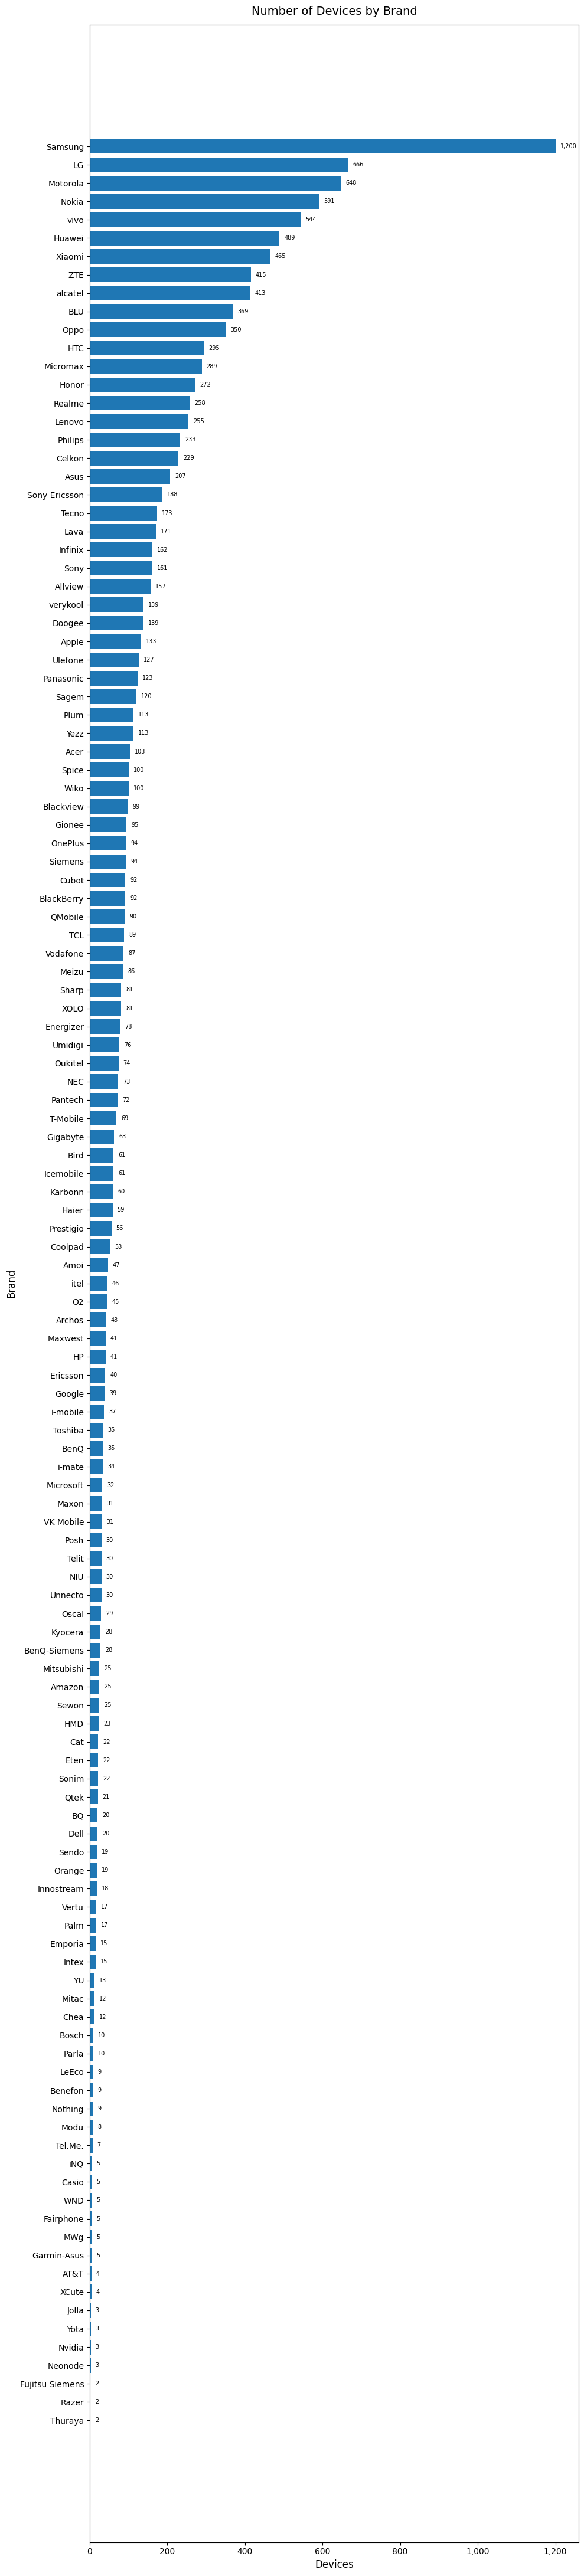

In [19]:
df = pd.read_excel("number_of_devices.xlsx")
df = df.rename(columns={"brand_name": "brand", "devices": "devices"})[["brand", "devices"]]
df = df.dropna(subset=["brand", "devices"])

df["devices"] = pd.to_numeric(df["devices"], errors="coerce")
df = df.dropna(subset=["devices"])

df = df.groupby("brand", as_index=False)["devices"].sum()

TOP_N = None 
df = df.sort_values("devices", ascending=False)
if TOP_N is not None:
    df_plot = df.head(TOP_N).copy()
else:
    df_plot = df.copy()


plt.figure(figsize=(10, max(5, 0.35 * len(df_plot))))  
ax = plt.barh(
    y=df_plot["brand"],
    width=df_plot["devices"],
)

plt.gca().invert_yaxis()

plt.title("Number of Devices by Brand", fontsize=14, pad=12)
plt.xlabel("Devices", fontsize=12)
plt.ylabel("Brand", fontsize=12)

plt.gca().xaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

for i, (brand, value) in enumerate(zip(df_plot["brand"], df_plot["devices"])):
    plt.text(
        x=value + (0.01 * df_plot["devices"].max()),  
        y=i,
        s=f"{int(value):,}",
        va="center",
        ha="left",
        fontsize=7
    )

plt.tight_layout()
plt.show()



### Average Price by Brand 
 
- Each dot represents the mean price of all models from that brand.  
- Brands are ordered to highlight which are positioned as **premium (higher dots)** vs. **budget-friendly (lower dots)**.  
- Emphasizes **relative ranking** more clearly.


     brand       Price
0     Acer  168.829574
1  Allview  190.133333
2   Amazon  157.600000
3    Apple  690.807236
4   Archos  215.217391


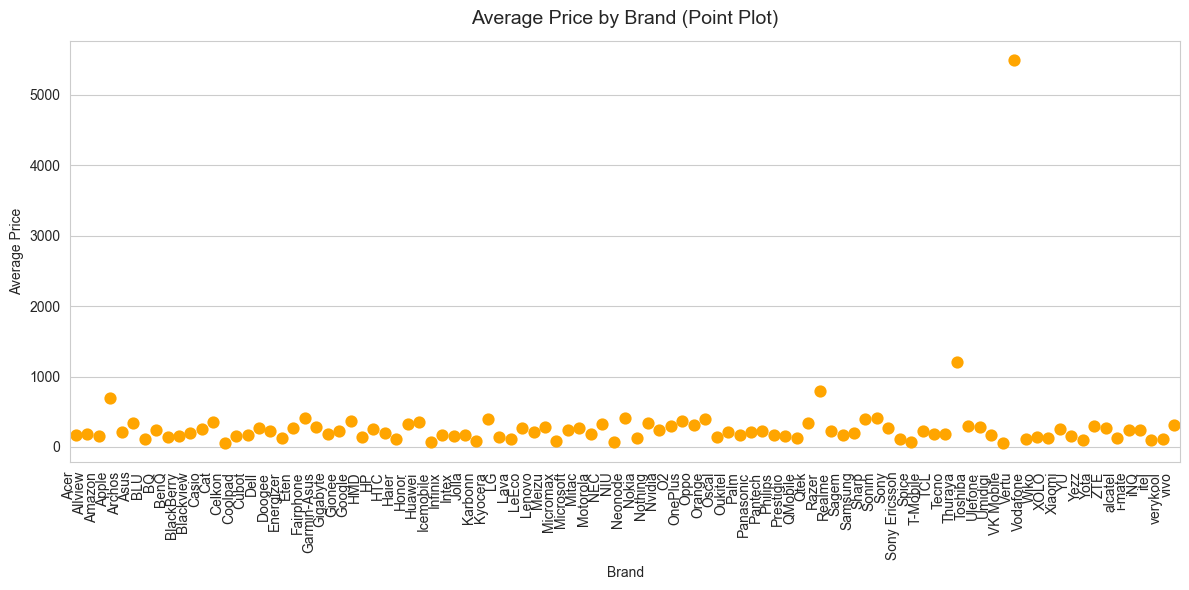

In [ ]:
brand_avg = pd.read_excel("df_avg_price.xlsx")

print(brand_avg.head())

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.pointplot(
    data=brand_avg,
    x="brand", 
    y="Price", 
    color="orange", 
    markers="o", 
    linestyles=""
)

plt.xticks(rotation=90, ha="right")
plt.title("Average Price by Brand ", fontsize=14, pad=12)
plt.ylabel("Average Price")
plt.xlabel("Brand")
plt.tight_layout()
plt.show()


### Average Price by Brand and Segment  

- Makes it easy to compare brands **within the same segment**.  
- Also Highlights how brand maintain its priority zone.
- Helps identify **premium-positioned** vs. **budget-focused** brands visually.  


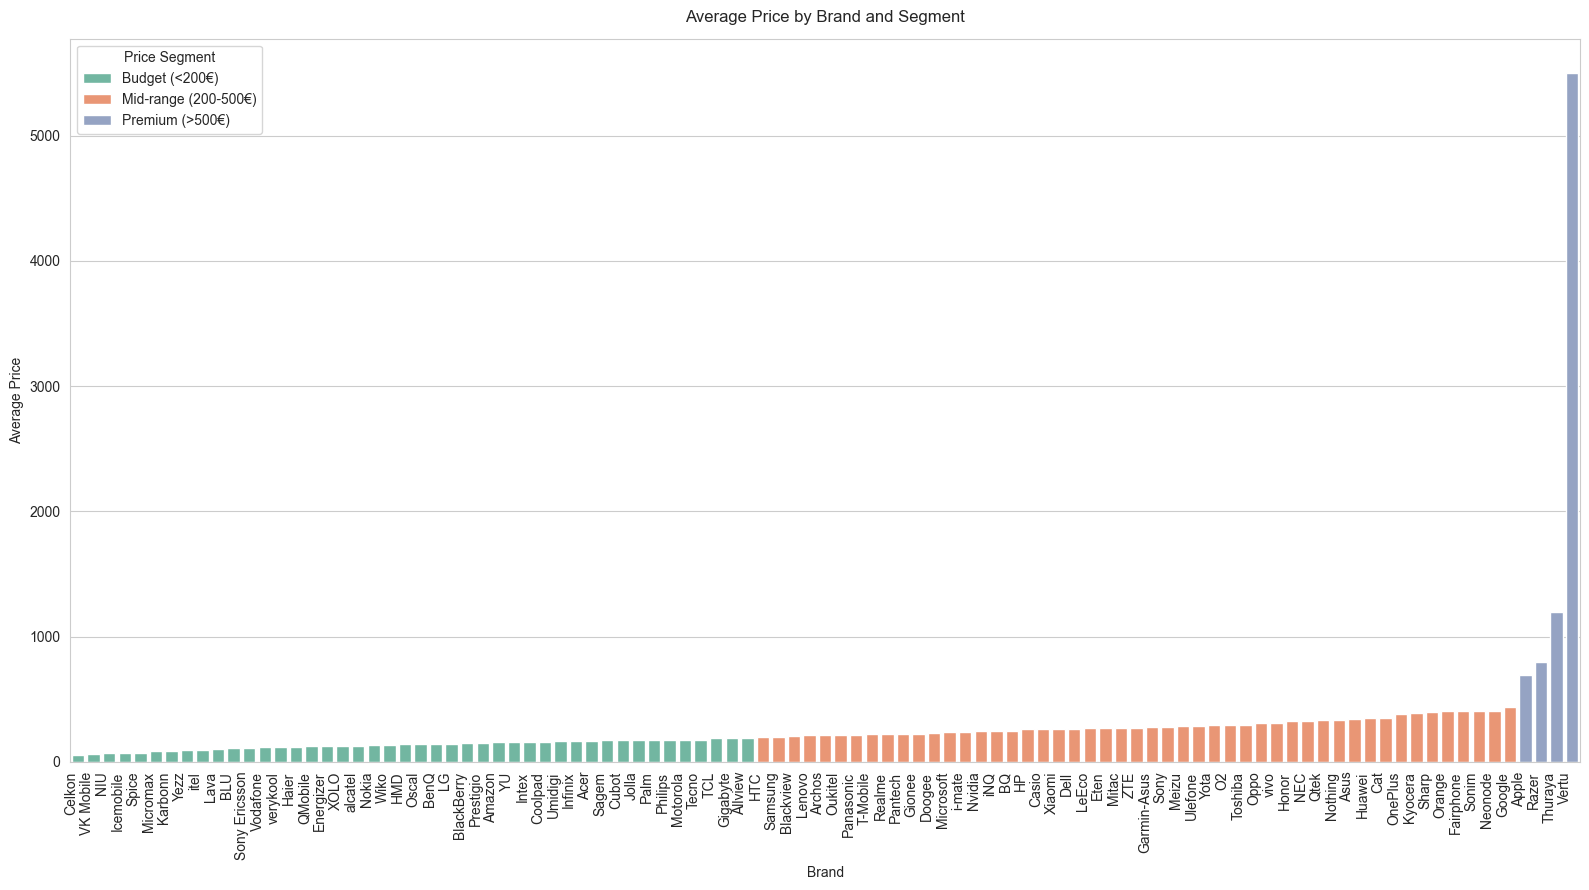

In [21]:
df = pd.read_excel("df_avg_price_with_segments.xlsx")


df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df = df.dropna(subset=["Price"])

plt.figure(figsize=(16,9))
sns.barplot(
    data=df,
    x="brand", 
    y="Price", 
    hue="price_segment", 
    palette="Set2"
)

plt.xticks(rotation=90, ha="right")
plt.title("Average Price by Brand and Segment", fontsize=12, pad=12)
plt.ylabel("Average Price")
plt.xlabel("Brand")

plt.legend(title="Price Segment")
plt.tight_layout()
plt.show()


### Available vs Discontinued Devices per Brand   
- Such analysis helps evaluate **sustainability of product lines, after-sales support needs, and long-term customer engagement strategies**.  

**Benefit**:  
By identifying brands with higher discontinuation rates, companies can refine their **product release frequency, market positioning, and customer retention strategies**.  

**Crucial Aspects Not Covered (Data Limitations):**  
- No visibility into **reasons for discontinuation** (e.g., low sales, technology shift, or strategic phase-out).  
- Missing insights on **sales performance of discontinued models** to judge whether retirements were successful or premature.

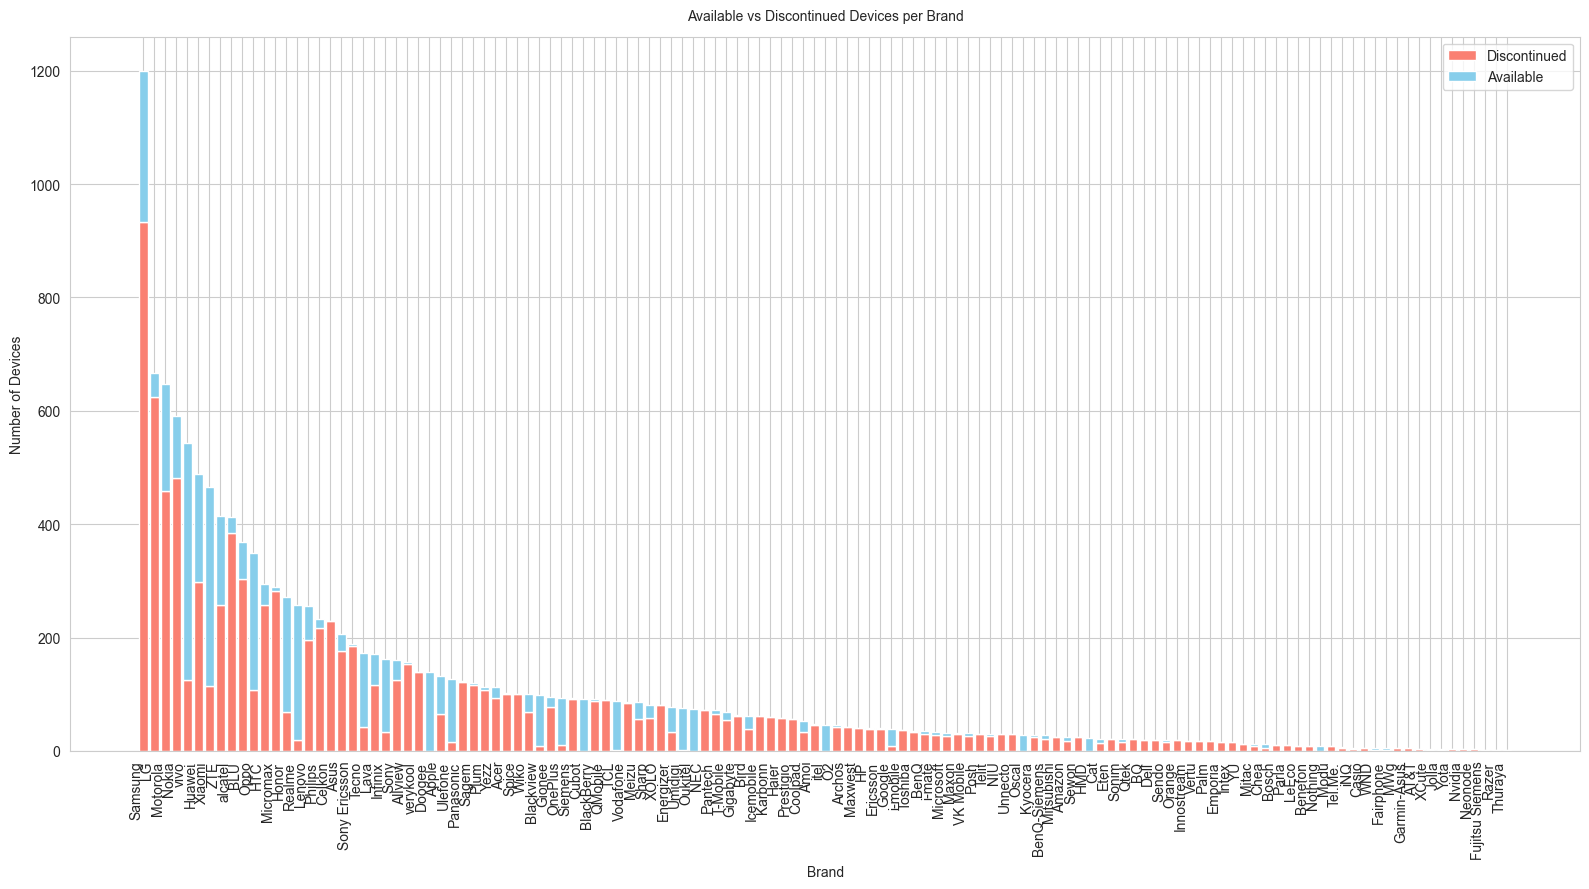

In [22]:
df = pd.read_excel("brand_summary.xlsx")


df["Devices_Available"] = df["Total_Devices"] - df["Devices_Discontinued"]

df = df.sort_values("Total_Devices", ascending=False)


plt.figure(figsize=(16,9))
plt.bar(df["brand"], df["Devices_Discontinued"], label="Discontinued", color="salmon")
plt.bar(df["brand"], df["Devices_Available"], 
        bottom=df["Devices_Discontinued"], label="Available", color="skyblue")

plt.xticks(rotation=90, ha="right")
plt.title("Available vs Discontinued Devices per Brand", fontsize=10, pad=12)
plt.ylabel("Number of Devices")
plt.xlabel("Brand")
plt.legend()

plt.tight_layout()
plt.show()


This analysis visualizes the distribution of devices across brands.

From an internal strategy perspective, this data is **highly valuable**: brands can identify which product lines have higher discontinuation rates, optimize inventory, and plan future device launches accordingly. 

Due to the scope of this dataset, the analysis is primarily useful for **internal business insights**. It provides limited actionable information from a **consumer standpoint**.
